# 1 Split train and val set

Ignore this part if it has been done.

In [1]:
import os, random, shutil

In [24]:
os.mkdir('data_train')
os.mkdir('data_train/data')

os.mkdir('data_val')
os.mkdir('data_val/data')

In [7]:
def moveFile(srcDir, destDir1, destDir2, training_portion=0.7):
    paths = os.listdir(srcDir)
    nums = len(paths)
    sample = random.sample(paths, int(training_portion * nums))
    
    for name in sample:
        shutil.move(os.path.join(srcDir, name), os.path.join(destDir1, name))
    
    paths = os.listdir(srcDir)
    for name in paths:
        shutil.move(os.path.join(srcDir, name), os.path.join(destDir2, name))

In [15]:
moveFile('./knnw-720p', './data_train/data', './data_val/data')

# 2 Load model

In [14]:
import sys
import yaml
from model.beta_vae import *
from trainer import *
from scene_detection import *
from torchvision import datasets, transforms
import torch
import torchvision.utils as vutils

In [2]:
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

In [22]:
model = BetaVAE(**config['model_params'])
best_model_name = 'Model_20210417'
data_dir = './data_train'

In [23]:
file_path = os.path.join(config['exp_params']['model_save_dir'], best_model_name)
checkpoint = torch.load(file_path)
model.load_state_dict(checkpoint['model_state_dict'])

BetaVAE(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (3): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (4): Seque

In [24]:
model.eval()

# 3 Load data

In [25]:
model_trainer = Trainer(model, config['exp_params'])
train_loader = model_trainer.load_data('train')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 4 Model output

In [26]:
real_batch = next(iter(train_loader))
output, _, mu, log_var = model.forward(real_batch[0].to(device))

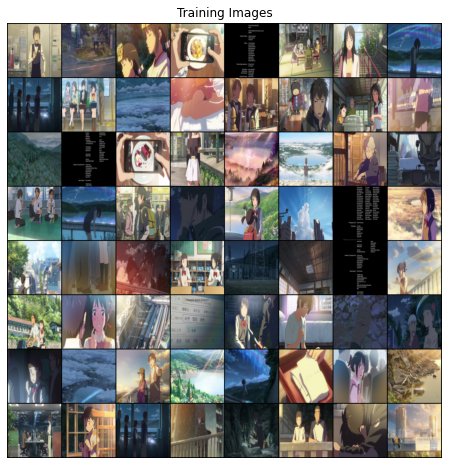

In [27]:
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

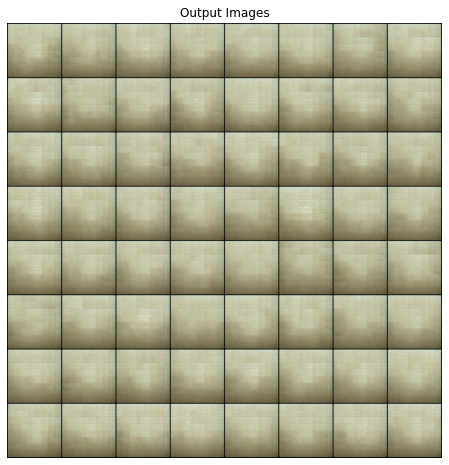

In [40]:
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Output Images")
plt.imshow(np.transpose(vutils.make_grid(output[:64], padding=2, normalize=True).cpu().detach().numpy(),(1,2,0)))